# Matching & Cleaning Google Play Store Data

## 0 · Setup

In [1]:
%pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd, numpy as np, seaborn as sns
import missingno as msno

## Load the apps CSV

In [3]:
df = pd.read_csv('googleplaystore.csv')
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7588,Cartoon Network Match Land,FAMILY,4.7,21979,38M,"1,000,000+",Free,0,Everyone,Puzzle,"July 9, 2018",1.1.3,5.1 and up
3868,ixigo Cabs-Compare & Book Taxi,MAPS_AND_NAVIGATION,4.2,11838,9.2M,"1,000,000+",Free,0,Everyone,Maps & Navigation,"April 9, 2018",1.7.3,4.0.3 and up
8149,CZ-Cyberon Voice Commander,TOOLS,3.8,131,3.3M,"1,000+",Paid,$5.99,Everyone,Tools,"March 7, 2017",3.2.17030601,2.2 and up
8281,DC-014,PHOTOGRAPHY,5.0,3,16M,500+,Free,0,Everyone,Photography,"June 14, 2018",1.0.3,4.1 and up
6454,BM Online OEC Verification,TOOLS,4.1,783,4.2M,"100,000+",Free,0,Everyone,Tools,"August 5, 2016",1.0.1,4.0.3 and up


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10874 entries, 0 to 10873
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0    App             10874 non-null  object 
 1   Category         10864 non-null  object 
 2   Rating           9387 non-null   float64
 3   Reviews          10872 non-null  object 
 4   Size             10869 non-null  object 
 5   Installs         10874 non-null  object 
 6   Type             10858 non-null  object 
 7   Price            10874 non-null  object 
 8   Content  Rating  10873 non-null  object 
 9   Genres           10874 non-null  object 
 10  Last Updated     10874 non-null  object 
 11  Current Ver      10865 non-null  object 
 12  Android Ver      10871 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## Data Cleaning

### 1. Which column(s) have **null** values?

<Axes: >

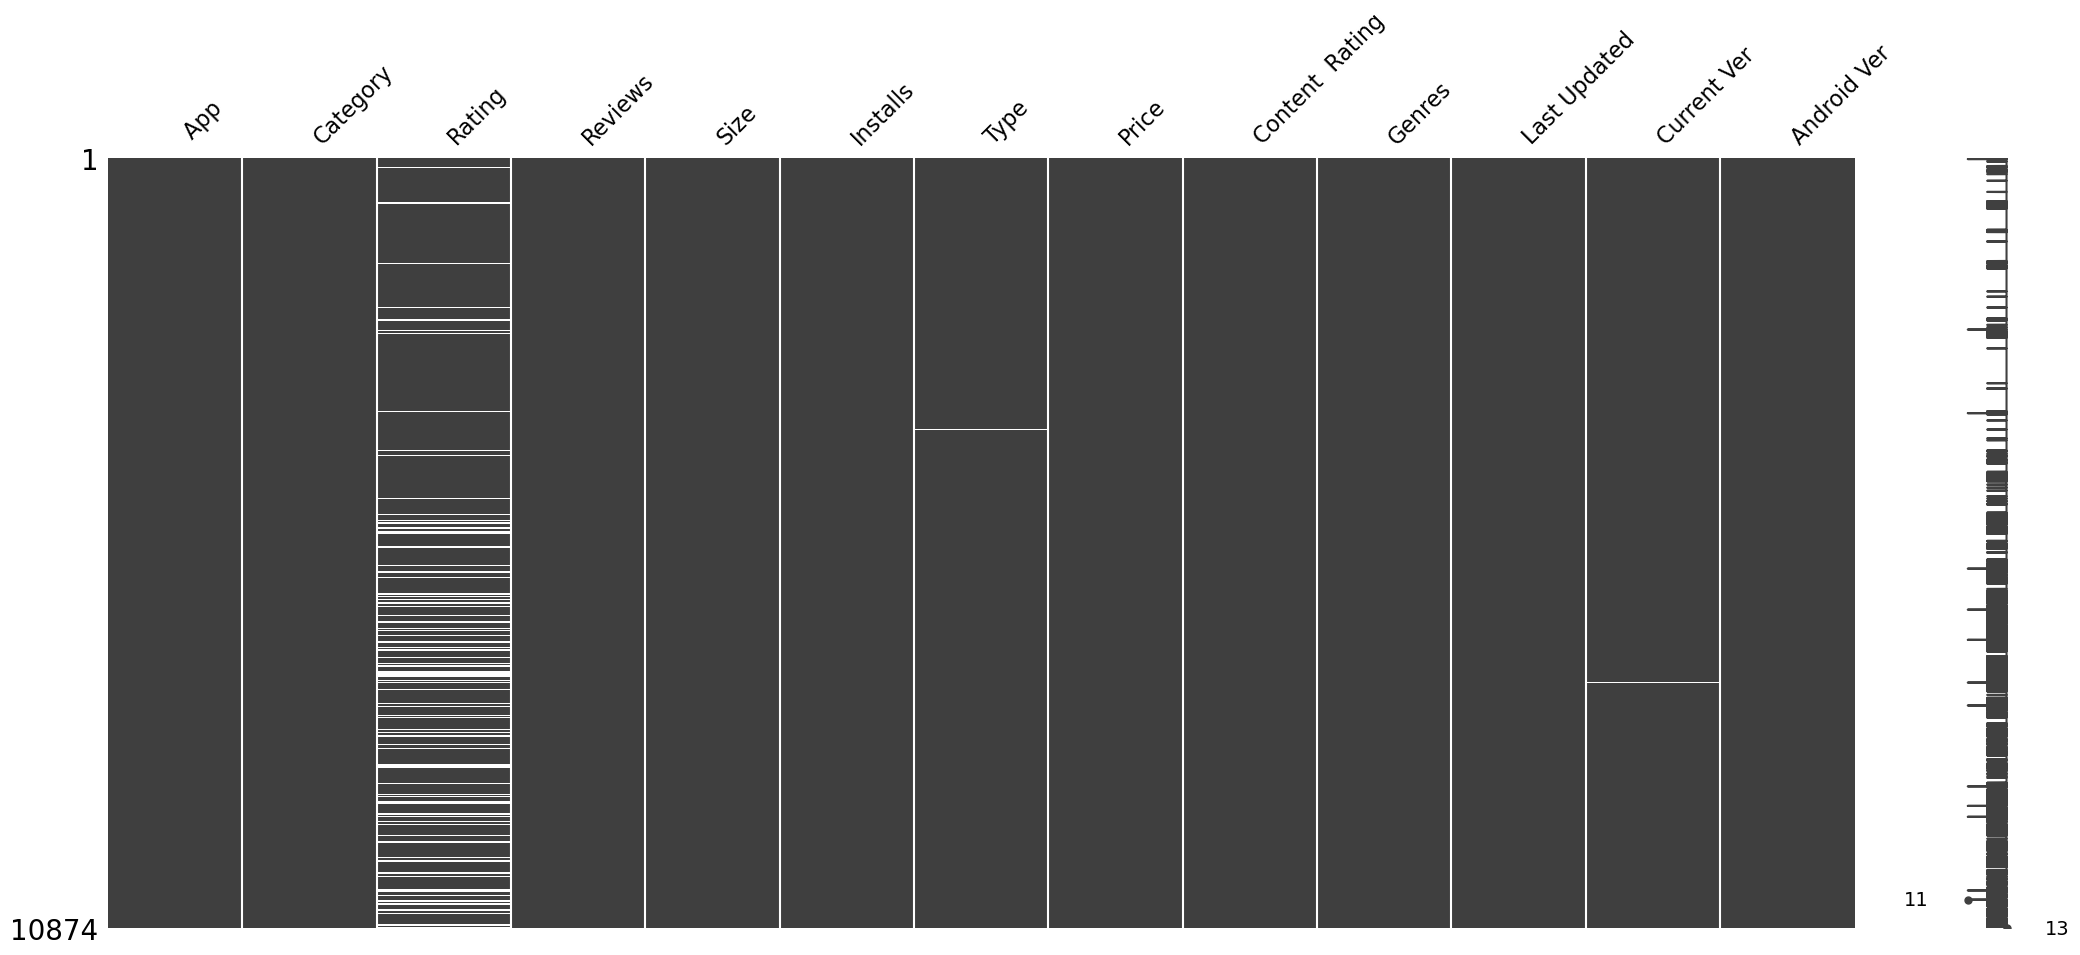

In [5]:
msno.matrix(df)

In [6]:
df.isna().sum().sort_values(ascending= False)

Rating             1487
Type                 16
Category             10
Current Ver           9
Size                  5
Android Ver           3
Reviews               2
Content  Rating       1
 App                  0
Installs              0
Price                 0
Genres                0
Last Updated          0
dtype: int64

In [7]:
# A1 = Ratings, Current Ver, Android Ver, Type and Content Rating

### 2. Clean the **Rating** column and other columns containing nulls

<Axes: >

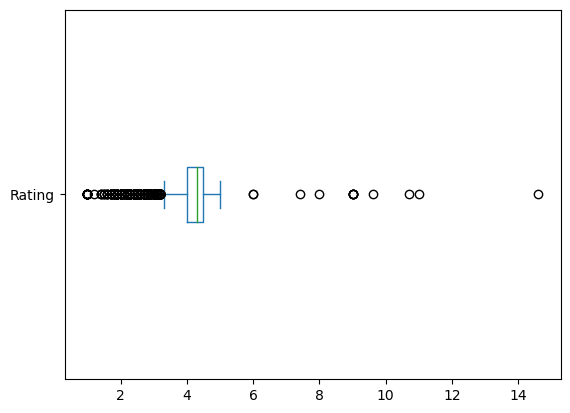

In [8]:
df['Rating'].plot(kind='box', vert=False)

In [9]:
df['Rating'].describe()

count    9387.000000
mean        4.198445
std         0.552112
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max        14.600000
Name: Rating, dtype: float64

In [10]:
df.loc[df['Rating'] > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,10.7,"50,000",19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,11.0,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
709,English for beginners,EDUCATION,9.6,9321,27M,"1,000,000+",Free,0,Everyone,Education,"July 18, 2018",2.9.0,4.0 and up
1440,White Noise Lite,HEALTH_AND_FITNESS,9.0,57634,41M,"1,000,000+",Free,0,Everyone,Health & Fitness,"June 25, 2018",7.4,4.1 and up
1549,Cool Popular Ringtones 2018 🔥,LIBRARIES_AND_DEMO,8.0,60170,28M,"1,000,000+",Free,0,Everyone,Libraries & Demo,"July 13, 2018",2.4,5.0 and up
3202,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,6.0,219848,Varies with device,"50,000,000+",Free,0,Everyone,Travel & Local,"August 2, 2018",Varies with device,Varies with device
3616,How do I care about my child?,PARENTING,9.0,34,4.9M,"10,000+",Free,0,Everyone,Parenting,"July 3, 2018",1.2,4.0 and up
4032,Dubsmash,VIDEO_PLAYERS,9.0,1971777,29M,"100,000,000+",Free,0,Teen,Video Players & Editors,2021-02-29,2.35.8,4.1 and up
5191,Extreme- Personal Voice Assistant,PRODUCTIVITY,9.0,25627,9.8M,"1,000,000+",Free,0,Everyone,Productivity,"August 5, 2018",132,5.0 and up
7113,CBRadioTab,TOOLS,6.0,127,1.5M,"50,000+",Free,0,Everyone,Tools,"April 1, 2017",1.0,3.0 and up


In [12]:
df.loc[df['Rating'] > 5, 'Rating'] = np.nan

In [14]:
df['Rating'].mean()

4.191647109024963

In [15]:
df['Rating'].fillna(df['Rating'].mean(), inplace = True)

In [17]:
df.dropna(inplace=True)

<Axes: >

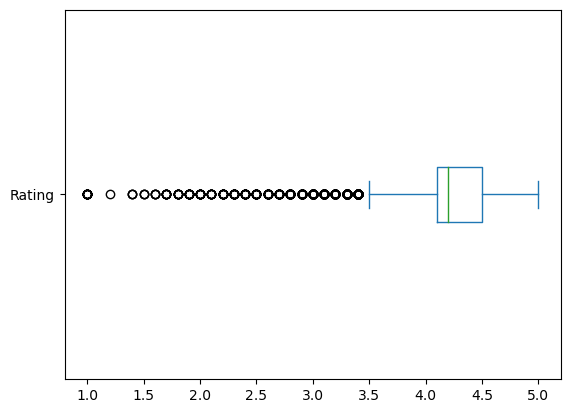

In [18]:
df['Rating'].plot(kind='box', vert=False)

### 3. Clean the column **Reviews** and make it numeric

In [19]:
df['Reviews'].head()

0    50,000
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: object

In [20]:
df['Reviews Numeric'] = pd.to_numeric(df['Reviews'], errors= 'coerce')

In [21]:
df.loc[df['Reviews Numeric'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews Numeric
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.191647,"50,000",19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,NaN
10,Text on Photo - Fonteee,ART_AND_DESIGN,4.400000,2.1M,28M,"1,000,000+",Free,0,Everyone,Art & Design,"October 27, 2017",1.0.4,4.1 and up,NaN
100,Natural recipes for your beauty,BEAUTY,4.700000,100k,9.8M,"100,000+",Free,0,Everyone,Beauty,"April 31, 2015",4.0,4.1 and up,NaN
2467,COPD GOLD 2017,MEDICAL,4.191647,"1,200,000",2.2M,10+,Free,0,Everyone,Medical,"July 13, 2018",1.0,4.0 and up,NaN
2965,Onefootball - Soccer Scores,SPORTS,4.700000,250k,20M,"10,000,000+",Free,0,Everyone,Sports,"August 1, 2018",10.8.1.330,4.4 and up,NaN
2990,Championat,SPORTS,4.300000,1M,Varies with device,"1,000,000+",Free,0,Everyone,Sports,"July 25, 2018",Varies with device,Varies with device,NaN
3334,osmino Wi-Fi: free WiFi,TOOLS,4.200000,"1,200,000",4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 6, 2018",6.06.14,4.4 and up,NaN
3668,HD Video Player,VIDEO_PLAYERS,4.300000,1M,2.9M,"1,000,000+",Free,0,Everyone,Video Players & Editors,"July 25, 2018",1.1,4.1 and up,NaN
4220,Helix,GAME,3.900000,10K,37M,"500,000+",Free,0,Everyone,Arcade,"September 10, 2017",1.2,4.0 and up,NaN
4345,Je Parle ANGLAIS - Apprendre l’anglais Audio c...,FAMILY,4.400000,"50,000",27M,"100,000+",Free,0,Everyone,Education,"March 13, 2018",2.4,4.0.3 and up,NaN


In [22]:
df.loc[df['Reviews'].str.contains('M')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews Numeric
10,Text on Photo - Fonteee,ART_AND_DESIGN,4.4,2.1M,28M,"1,000,000+",Free,0,Everyone,Art & Design,"October 27, 2017",1.0.4,4.1 and up,NaN
2990,Championat,SPORTS,4.3,1M,Varies with device,"1,000,000+",Free,0,Everyone,Sports,"July 25, 2018",Varies with device,Varies with device,NaN
3668,HD Video Player,VIDEO_PLAYERS,4.3,1M,2.9M,"1,000,000+",Free,0,Everyone,Video Players & Editors,"July 25, 2018",1.1,4.1 and up,NaN


In [23]:
df.loc[df['Reviews'].str.contains('M'),'Reviews']

10      2.1M
2990      1M
3668      1M
Name: Reviews, dtype: object

In [24]:
df.loc[df['Reviews'].str.contains('M'),'Reviews'].str.replace('M', '')

10      2.1
2990      1
3668      1
Name: Reviews, dtype: object

In [25]:
pd.to_numeric(df.loc[df['Reviews'].str.contains('M'),'Reviews'].str.replace('M', '')) * 1_000_000

10      2100000.0
2990    1000000.0
3668    1000000.0
Name: Reviews, dtype: float64

In [26]:
new_reviews = (
    pd.to_numeric(
        df.loc[df['Reviews'].str.contains('M'),'Reviews'].str.replace('M', '')
    ) * 1_000_000).astype(str)
new_reviews

10      2100000.0
2990    1000000.0
3668    1000000.0
Name: Reviews, dtype: object

In [27]:
df.loc[df['Reviews'].str.contains('M'),'Reviews'] = (
    pd.to_numeric(
        df.loc[df['Reviews'].str.contains('M'),'Reviews'].str.replace('M', '')
    ) * 1_000_000).astype(str)

In [28]:
df.loc[df['Reviews'].str.contains('k'),'Reviews'] = (
    pd.to_numeric(
        df.loc[df['Reviews'].str.contains('k'),'Reviews'].str.replace('k', '')
    ) * 1_000).astype(str)

In [29]:
df.loc[df['Reviews'].str.contains('K'),'Reviews'] = (
    pd.to_numeric(
        df.loc[df['Reviews'].str.contains('K'),'Reviews'].str.replace('K', '')
    ) * 1_000).astype(str)

In [30]:
mask = df['Reviews'].astype(str).str.contains(',')


df.loc[mask, 'Reviews'] = (
    pd.to_numeric(                       
        df.loc[mask, 'Reviews']
          .astype(str)                  
          .str.replace(',', '')
    , errors='coerce')
    .astype(int)                        
    .astype(str) + '.0'                 
)

In [31]:
df.loc[df['Reviews Numeric'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews Numeric
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.191647,50000.0,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,NaN
10,Text on Photo - Fonteee,ART_AND_DESIGN,4.400000,2100000.0,28M,"1,000,000+",Free,0,Everyone,Art & Design,"October 27, 2017",1.0.4,4.1 and up,NaN
100,Natural recipes for your beauty,BEAUTY,4.700000,100000,9.8M,"100,000+",Free,0,Everyone,Beauty,"April 31, 2015",4.0,4.1 and up,NaN
2467,COPD GOLD 2017,MEDICAL,4.191647,1200000.0,2.2M,10+,Free,0,Everyone,Medical,"July 13, 2018",1.0,4.0 and up,NaN
2965,Onefootball - Soccer Scores,SPORTS,4.700000,250000,20M,"10,000,000+",Free,0,Everyone,Sports,"August 1, 2018",10.8.1.330,4.4 and up,NaN
2990,Championat,SPORTS,4.300000,1000000.0,Varies with device,"1,000,000+",Free,0,Everyone,Sports,"July 25, 2018",Varies with device,Varies with device,NaN
3334,osmino Wi-Fi: free WiFi,TOOLS,4.200000,1200000.0,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 6, 2018",6.06.14,4.4 and up,NaN
3668,HD Video Player,VIDEO_PLAYERS,4.300000,1000000.0,2.9M,"1,000,000+",Free,0,Everyone,Video Players & Editors,"July 25, 2018",1.1,4.1 and up,NaN
4220,Helix,GAME,3.900000,10000,37M,"500,000+",Free,0,Everyone,Arcade,"September 10, 2017",1.2,4.0 and up,NaN
4345,Je Parle ANGLAIS - Apprendre l’anglais Audio c...,FAMILY,4.400000,50000.0,27M,"100,000+",Free,0,Everyone,Education,"March 13, 2018",2.4,4.0.3 and up,NaN


In [32]:
df['Reviews'] = pd.to_numeric(df['Reviews'])

### 4. How many **duplicated apps** are there?

In [33]:
df = df.rename(columns=lambda c: c.strip())   # remove stray spaces

if df.index.name == 'App':
    df = df.reset_index()

# Safety check
assert 'App' in df.columns, "App column still missing – re-load the raw DataFrame!"

dupes = df.loc[df.duplicated(subset=['App'], keep=False)] \
          .sort_values(by='App')

print("Duplicate rows:", len(dupes))
print("Distinct duplicated apps:", dupes['App'].nunique())
dupes.head(10)

Duplicate rows: 2037
Distinct duplicated apps: 826


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews Numeric
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490.0,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,2490.0
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490.0,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,2490.0
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160.0,26M,"1,000,000+",Free,0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up,23160.0
2322,1800 Contacts - Lens Store,MEDICAL,4.7,23160.0,26M,"1,000,000+",Free,0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up,23160.0
2385,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12.0,3.8M,"1,000+",Paid,$16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up,12.0
2256,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12.0,3.8M,"1,000+",Paid,$16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up,12.0
1337,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.4,11506.0,15M,"100,000+",Free,0,Everyone,Health & Fitness,"August 2, 2018",3.0.0,4.1 and up,11506.0
1434,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.4,11506.0,15M,"100,000+",Free,0,Everyone,Health & Fitness,"August 2, 2018",3.0.0,4.1 and up,11506.0
3083,365Scores - Live Scores,SPORTS,4.6,666521.0,25M,"10,000,000+",Free,0,Everyone,Sports,"July 29, 2018",5.5.9,4.1 and up,666521.0
5415,365Scores - Live Scores,SPORTS,4.6,666246.0,25M,"10,000,000+",Free,0,Everyone,Sports,"July 29, 2018",5.5.9,4.1 and up,666246.0


In [34]:
df.duplicated(subset=['App'], keep=False).sum()

2037

### 5. **Drop duplicated apps**, keeping the row with the greatest number of reviews

In [35]:
df.loc[df.duplicated(subset=['App'], keep=False) & ~df.duplicated(keep=False)].sort_values(by=['App']).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews Numeric
5415,365Scores - Live Scores,SPORTS,4.6,666246.0,25M,"10,000,000+",Free,0,Everyone,Sports,"July 29, 2018",5.5.9,4.1 and up,666246.0
3083,365Scores - Live Scores,SPORTS,4.6,666521.0,25M,"10,000,000+",Free,0,Everyone,Sports,"July 29, 2018",5.5.9,4.1 and up,666521.0
1703,8 Ball Pool,GAME,4.5,14198602.0,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up,14198602.0
1675,8 Ball Pool,GAME,4.5,14198297.0,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up,14198297.0
1970,8 Ball Pool,GAME,4.5,14201604.0,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up,14201604.0
1755,8 Ball Pool,GAME,4.5,14200344.0,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up,14200344.0
1844,8 Ball Pool,GAME,4.5,14200550.0,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up,14200550.0
3953,8 Ball Pool,SPORTS,4.5,14184910.0,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up,14184910.0
1871,8 Ball Pool,GAME,4.5,14201891.0,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up,14201891.0
662,95Live -SG#1 Live Streaming App,DATING,4.1,4954.0,15M,"1,000,000+",Free,0,Teen,Dating,"August 1, 2018",8.7.2,4.2 and up,4954.0


In [36]:
# df_copy_5 = df.copy()

In [37]:
del df['Reviews Numeric']

In [38]:
df.sort_values(by=['App', 'Reviews'], inplace = True)

In [39]:
df.drop_duplicates(subset = ['App'], keep='last', inplace=True)

### 6. Format the **Category** column

In [40]:
df['Category'].value_counts()

Category
FAMILY                 1869
GAME                    943
TOOLS                   824
BUSINESS                415
MEDICAL                 394
PERSONALIZATION         374
PRODUCTIVITY            372
LIFESTYLE               368
FINANCE                 344
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             279
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     221
TRAVEL_AND_LOCAL        218
SHOPPING                201
DATING                  169
VIDEO_PLAYERS           164
MAPS_AND_NAVIGATION     130
FOOD_AND_DRINK          112
EDUCATION               105
ENTERTAINMENT            86
AUTO_AND_VEHICLES        84
LIBRARIES_AND_DEMO       83
WEATHER                  79
HOUSE_AND_HOME           73
EVENTS                   64
ART_AND_DESIGN           59
PARENTING                59
COMICS                   56
BEAUTY                   53
Name: count, dtype: int64

In [41]:
df['Category'] = df['Category'].str.replace('_', ' ') 

In [42]:
df['Category'] = df['Category'].str.capitalize() 

### 7. Clean & convert the **Installs** column to numeric type

In [43]:
df['Installs'].head(5)

8884          500+
8532    1,000,000+
324        10,000+
4541       10,000+
4636       10,000+
Name: Installs, dtype: object

In [44]:
df['Installs'] = pd.to_numeric(df['Installs'].str.replace('+', '').str.replace(',', ''))

### 8. Clean & convert the **Size** column to numeric (bytes)

In [46]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8884,"""i DT"" Fútbol. Todos Somos Técnicos.",Sports,4.191647,27.0,3.6M,500,Free,0,Everyone,Sports,"October 7, 2017",0.22,4.1 and up
8532,+Download 4 Instagram Twitter,Social,4.500000,40467.0,22M,1000000,Free,$0,Everyone,Social,"August 2, 2018",5.03,4.1 and up
324,- Free Comics - Comic Apps,Comics,3.500000,115.0,9.1M,10000,Free,0,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up
4541,.R,Tools,4.500000,259.0,203k,10000,Free,0,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up
4636,/u/app,Communication,4.700000,573.0,53M,10000,Free,0,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up


In [47]:
# df_copy_8 = df.copy()

In [48]:
import re

def size_to_bytes(text):

    # -------------------------------------------------------------------- #
    if text is None or pd.isna(text):
        return pd.NA

    s = str(text).strip().replace(',', '')         
    if s == '' or s.lower() in {'varies with device', 'na'}:
        return pd.NA

    m = re.match(r'^([0-9]*\.?[0-9]+)\s*([kmg]?)(b)?$', s, flags=re.I)
    if not m:
        return pd.NA

    value, unit, _ = m.groups()
    value = float(value)
    unit  = unit.lower()

    factor = {'k': 1024,
              'm': 1024 ** 2,
              'g': 1024 ** 3,
              '':  1}              

    return int(round(value * factor[unit]))

# -------------------------------------------------------------------------
df['Size'] = df['Size'].apply(size_to_bytes).astype('Int64')

In [49]:
df['Size']

8884     3774874
8532    23068672
324      9542042
4541      207872
4636    55574528
          ...   
6334    61865984
4362    27262976
2575    18874368
7559     3355443
882      4194304
Name: Size, Length: 9619, dtype: Int64

### 9. Clean and convert the **price** columnto numeric

In [50]:
price_clean = (
    df['Price']
      .astype(str)                               
      .str.strip()                                
      .str.replace(r'(?i)^free$', '0',  regex=True)   
      .str.replace(r'(?i)^usd\s*',  '', regex=True)   
      .str.replace(r'[$£]',          '', regex=True)  
)

df['Price'] = pd.to_numeric(price_clean, errors='coerce')   

In [51]:
df['Price'] = pd.to_numeric(
    df['Price'].astype('string').str.replace('$', '', regex=False),
    errors='coerce'
)

In [52]:
size_numeric = df['Size'].apply(size_to_bytes)      

df['Size'] = np.where(
    size_numeric.notna(),                
    size_numeric.astype('Int64'),        
    'Varies with device'                 
).astype('object')                       

### 10. **Paid or free?**

In [53]:
df['Distribution'] = 'Free'

In [54]:
df.loc[df['Price'] > 0, 'Distribution'] = 'Paid'

## Analysis

### 11. Which app has the most reviews?

In [55]:
df.sort_values('Reviews',ascending=False).head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Distribution
2544,Facebook,Social,4.1,78158306.0,Varies with device,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,Free


### 12. What category has the highest number of apps uploaded to the store?

In [56]:
df['Category'].value_counts()


Category
Family                 1869
Game                    943
Tools                   824
Business                415
Medical                 394
Personalization         374
Productivity            372
Lifestyle               368
Finance                 344
Sports                  325
Communication           315
Health and fitness      288
Photography             279
News and magazines      254
Social                  239
Books and reference     221
Travel and local        218
Shopping                201
Dating                  169
Video players           164
Maps and navigation     130
Food and drink          112
Education               105
Entertainment            86
Auto and vehicles        84
Libraries and demo       83
Weather                  79
House and home           73
Events                   64
Art and design           59
Parenting                59
Comics                   56
Beauty                   53
Name: count, dtype: int64

In [57]:
# A12 = Family

### 13. To which category belongs the most expensive app?

In [58]:
df.sort_values('Price', ascending =False).head(1)[['App', 'Category', 'Price']]

,App,Category,Price
4367,I'm Rich - Trump Edition,Lifestyle,400.0


In [59]:
df.sort_values('Price', ascending =False).head(1)[['Category']]

,Category
4367,Lifestyle


### 14. What’s the name of the most expensive game?

In [60]:
df[df['Category'] == 'Game'].sort_values('Price', ascending = False)[['App']].head(1)

,App
4203,The World Ends With You


### 15. Which is the most popular Finance app (most installs)?

In [61]:
df[df['Category'] == 'Finance'].sort_values('Installs', ascending = False)[['App', 'Installs']].head(1)

,App,Installs
5601,Google Pay,100000000


### 16. What **Teen** game has the most reviews?

In [62]:
df.columns = df.columns.str.replace(r'\s+', ' ', regex=True).str.strip()

In [67]:
df[(df['Content Rating'].str.contains('Teen')) & (df['Category'].str.contains('Game'))].sort_values('Reviews', ascending=False).head(1)[['App', 'Reviews' ,'Category','Content Rating']]

,App,Reviews,Category,Content Rating
3912,Asphalt 8: Airborne,8389714.0,Game,Teen


### 17. Which is the free game with the most reviews?

In [71]:
df[(df['Distribution'].str.contains('Free')) & (df['Category'].str.contains('Game'))].sort_values('Reviews', ascending = False).head(1)[['App', 'Reviews', 'Genres','Distribution']]

,App,Reviews,Genres,Distribution
1879,Clash of Clans,44893888.0,Strategy,Free


### 18. How many **TiB** (tebibytes) were transferred overall for the most popular Lifestyle app? (size × installs → convert)

In [83]:
app = df.query("Category == 'Lifestyle' ").sort_values('Installs', ascending= False).iloc[0]
app

App                       Tinder
Category               Lifestyle
Rating                       4.0
Reviews                2789775.0
Size                    71303168
Installs               100000000
Type                        Free
Price                        0.0
Content Rating        Mature 17+
Genres                 Lifestyle
Last Updated      August 2, 2018
Current Ver                9.5.0
Android Ver           4.4 and up
Distribution                Free
Name: 4587, dtype: object

In [85]:
A18 = (app['Installs'] * app['Size']) / (1024 * 1024 * 1024 *1024)
A18

6484.9853515625